<a href="https://colab.research.google.com/github/Elham-Esmaeelnia/mlp-tensorflow-_classification/blob/main/classification_by_mlp_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print('x_train_full shape: ', X_train_full.shape, 'x_train_full type: ', X_train_full.dtype)
print('y_train_full shape: ', y_train_full.shape, 'y_train_full type: ', y_train_full.dtype)
print('x_test shape: ', X_test.shape, 'x_test type: ', X_test.dtype)
print('y_test shape:', y_test.shape, 'y_test type', y_test.dtype)

x_train_full shape:  (60000, 28, 28) x_train_full type:  uint8
y_train_full shape:  (60000,) y_train_full type:  uint8
x_test shape:  (10000, 28, 28) x_test type:  uint8
y_test shape: (10000,) y_test type uint8


In [6]:
x_valid, x_train = X_train_full[50000:] / 255.0, X_train_full[:50000] / 255.0
y_valid, y_train = y_train_full[50000:], y_train_full[:50000]

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [11]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7328 - accuracy: 0.7604 - val_loss: 0.5502 - val_accuracy: 0.8074
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4996 - accuracy: 0.8271 - val_loss: 0.5115 - val_accuracy: 0.8154
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4515 - accuracy: 0.8424 - val_loss: 0.4666 - val_accuracy: 0.8370
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4223 - accuracy: 0.8525 - val_loss: 0.4158 - val_accuracy: 0.8540
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4011 - accuracy: 0.8594 - val_loss: 0.4841 - val_accuracy: 0.8184
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3840 - accuracy: 0.8652 - val_loss: 0.4003 - val_accuracy: 0.8600
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3706 - accuracy: 0.8686 - val_loss: 0.3991 - val_accuracy:

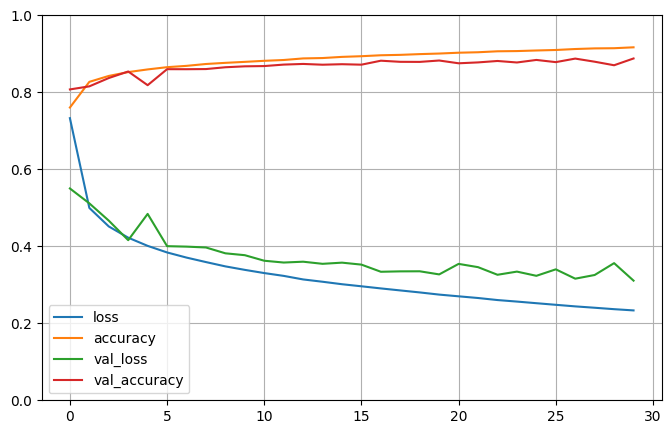

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [14]:
model.evaluate(X_test/255, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3315 - accuracy: 0.8837


[0.3314928114414215, 0.8837000131607056]